## Ideas

- Discoveries per year
- Statistical analysis of mass, period

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

![img](https://lh3.googleusercontent.com/ia1XqXPsY1-hKZOyMMxtP8vWQkCw5JOJgIle_dztdip0yf-FzYH_T82Vj8gpGhrmdA1ui7kz_YnnGhtRB3lCsn7zLEOaBXbqxCpR1521pAWFg7YRQKLXUDk_P0botZ4_uQ=w1280)

In [25]:
s_earth = 1361.0 # W/m^2
r_earth = 6378.137 # km

In [26]:
def ESI1(s, r):
    return 1 - np.sqrt(0.5 * (((s_earth * (s-1))/(s_earth * (s+1))**2 + (((r_earth * (r-1)/(r_earth * (r+1))**2))))))

def ESI2(s, r):
    return 1 - np.sqrt(0.5 * ( ((s-s_earth)/(s+s_earth))**2 + ((r-r_earth)/(r_earth+r))**2 ))

In [27]:
s = np.linspace(10e-4, 10e+2, int(10e+3)) 
r = np.linspace(10e-3, 10e+1, int(10e+3))
ss, rr = np.meshgrid(s, r)
esi = ESI2(ss * s_earth, rr * r_earth)

Import NASA Exoplanet Data:

In [28]:
nasa_csv = pd.read_csv('exoplanet_q1.csv').drop_duplicates('pl_name')
nasa_disc_year = np.array(nasa_csv['disc_year'].dropna())
nasa_data = nasa_csv[['pl_rade', 'pl_insol', 'disc_year']].dropna().sort_values('disc_year', ascending=False)
svals = np.array(nasa_data['pl_insol'])[:2000]
rvals = np.array(nasa_data['pl_rade'])[:2000]

Import HEC Data:

In [29]:
hec_csv = pd.read_csv('hec.csv')
hec_svals = np.array(hec_csv['pl_insol'])
hec_rvals = np.array(hec_csv['pl_rade'])
hec_temps = np.array(hec_csv['pl_eqt'])
hec_dist = np.array(hec_csv['sy_dist'])

In [30]:
lvls = np.linspace(0, 1, 9)

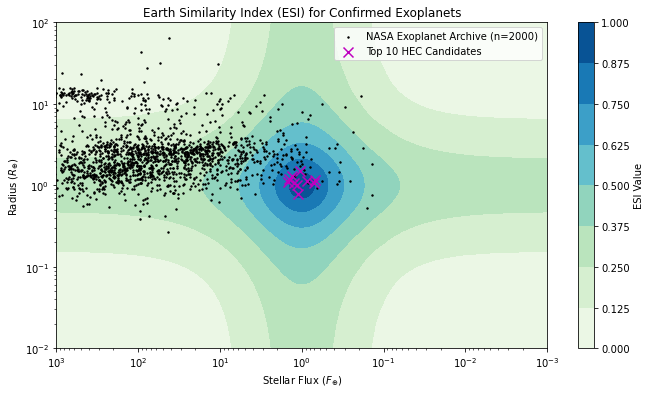

In [31]:
fig1, ax1 = plt.subplots(figsize=(11, 6))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(10e-4, 10e2)
ax1.set_ylim(10e-3, 10e1)
ax1.set_title('Earth Similarity Index (ESI) for Confirmed Exoplanets')
ax1.set_xlabel(r'Stellar Flux $(F_{\oplus})$')
ax1.set_ylabel(r'Radius $(R_{\oplus})$')
ax1.invert_xaxis()
cont = ax1.contourf(ss, rr, esi, cmap='GnBu', levels=lvls)
ax1.scatter(svals, rvals, s=2, c='k', label='NASA Exoplanet Archive (n=2000)')
ax1.scatter(hec_svals, hec_rvals, s=100, marker='x', c='m', label='Top 10 HEC Candidates')
ax1.legend()
fig1.colorbar(cont, label='ESI Value')
plt.show()

Compare Solar Flux with Surface Temperature:

In [32]:
# Polynomial fit line (p=1, linear)
model_coeff = np.polyfit(hec_svals, hec_temps, 1)
model_func = np.poly1d(model_coeff)
x = np.arange(0.7, 1.5, 0.01)
f_x = model_func(x)

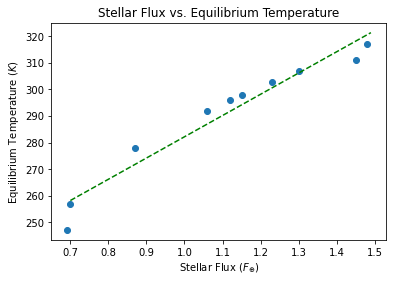

In [33]:
fig2, ax2 = plt.subplots()
ax2.scatter(hec_svals, hec_temps)
ax2.plot(x, f_x, '--', c='g')
ax2.set_xlabel(r'Stellar Flux ($F_{\oplus}$)')
ax2.set_ylabel(r'Equilibrium Temperature ($K$)')
ax2.set_title('Stellar Flux vs. Equilibrium Temperature')
plt.show()

Compare discoveries per year:

In [45]:
year_bins = np.bincount(nasa_disc_year)[2000:2023] # from years 2000 to 2022
years = np.arange(2000, 2022+1, 1)

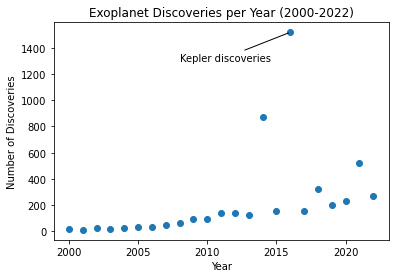

In [63]:
fig3, ax3 = plt.subplots()
ax3.scatter(years, year_bins)
ax3.set_title('Exoplanet Discoveries per Year (2000-2022)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Discoveries')
ax3.annotate('Kepler discoveries', xy=(2016, 1518), xytext=(2008, 1300),
    arrowprops=dict(arrowstyle='-')
)
plt.show()